In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

## re doing

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10bbe9002bc55588b4a95634d578aba1


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10bbe9002bc55588b4a95634d578aba1&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.12,
  'feels_like': 28.17,
  'temp_min': 30.99,
  'temp_max': 44.6,
  'pressure': 1011,
  'humidity': 52},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1578006997,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1577967208,
  'sunset': 1578000140},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.12,
  'feels_like': 28.17,
  'temp_min': 30.99,
  'temp_max': 44.6,
  'pressure': 1011,
  'humidity': 52},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1578006997,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1577967208,
  'sunset': 1578000140},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.12,
  'feels_like': 28.17,
  'temp_min': 30.99,
  'temp_max': 44.6,
  'pressure': 1011,
  'humidity': 52},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1578006997,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1577967208,
  'sunset': 1578000140},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | toora-khem
Processing Record 2 of Set 12 | luocheng
Processing Record 3 of Set 12 | east london
Processing Record 4 of Set 12 | cape town
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 12 | edd
Processing Record 8 of Set 12 | ozinki
Processing Record 9 of Set 12 | aguas vermelhas
Processing Record 10 of Set 12 | yarmouth
Processing Record 11 of Set 12 | upernavik
Processing Record 12 of Set 12 | mataura
Processing Record 13 of Set 12 | hamilton
Processing Record 14 of Set 12 | coquimbo
Processing Record 15 of Set 12 | punta arenas
Processing Record 16 of Set 12 | delvada
Processing Record 17 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 12 | tiksi
Processing Record 19 of Set 12 | hobart
Processing Record 20 of Set 12 | bathsheba
Processing Record 21 of Set 12 | makakilo

Processing Record 35 of Set 15 | guerrero negro
Processing Record 36 of Set 15 | hay river
Processing Record 37 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 15 | chokurdakh
Processing Record 39 of Set 15 | saldanha
Processing Record 40 of Set 15 | mayo
Processing Record 41 of Set 15 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 15 | petatlan
Processing Record 43 of Set 15 | arraial do cabo
Processing Record 44 of Set 15 | centralina
Processing Record 45 of Set 15 | havelock
Processing Record 46 of Set 15 | strezhevoy
Processing Record 47 of Set 15 | victoria
Processing Record 48 of Set 15 | butaritari
Processing Record 49 of Set 15 | tamandare
Processing Record 50 of Set 15 | nikolskoye
Processing Record 1 of Set 16 | tuatapere
Processing Record 2 of Set 16 | taltal
Processing Record 3 of Set 16 | sao joao da barra
Processing Record 4 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 16 | clin

Processing Record 16 of Set 19 | saleaula
City not found. Skipping...
Processing Record 17 of Set 19 | krasnogvardeyskoye
Processing Record 18 of Set 19 | urucara
Processing Record 19 of Set 19 | puerto baquerizo moreno
Processing Record 20 of Set 19 | merauke
Processing Record 21 of Set 19 | enshi
Processing Record 22 of Set 19 | tigil
Processing Record 23 of Set 19 | joson
Processing Record 24 of Set 19 | santa cruz del sur
Processing Record 25 of Set 19 | grajau
City not found. Skipping...
Processing Record 26 of Set 19 | mayor pablo lagerenza
Processing Record 27 of Set 19 | santa vitoria do palmar
Processing Record 28 of Set 19 | acapulco
Processing Record 29 of Set 19 | karasjok
Processing Record 30 of Set 19 | sobolevo
Processing Record 31 of Set 19 | ankang
Processing Record 32 of Set 19 | yurkivka
Processing Record 33 of Set 19 | half moon bay
Processing Record 34 of Set 19 | port augusta
Processing Record 35 of Set 19 | villa carlos paz
Processing Record 36 of Set 19 | bakaly

Processing Record 49 of Set 22 | bolungarvik
City not found. Skipping...
Processing Record 50 of Set 22 | campbell river
Processing Record 1 of Set 23 | kurilsk
Processing Record 2 of Set 23 | armacao dos buzios
City not found. Skipping...
Processing Record 3 of Set 23 | dunedin
Processing Record 4 of Set 23 | ossora
Processing Record 5 of Set 23 | liverpool
Processing Record 6 of Set 23 | rawannawi
City not found. Skipping...
Processing Record 7 of Set 23 | smithers
Processing Record 8 of Set 23 | mgandu
Processing Record 9 of Set 23 | ghanzi
Processing Record 10 of Set 23 | shkotovo-26
City not found. Skipping...
Processing Record 11 of Set 23 | mapiripan
Processing Record 12 of Set 23 | mongar
Processing Record 13 of Set 23 | port arthur
Processing Record 14 of Set 23 | guangshui
Processing Record 15 of Set 23 | los llanos de aridane
Processing Record 16 of Set 23 | destelbergen
Processing Record 17 of Set 23 | miyako
Processing Record 18 of Set 23 | grand gaube
Processing Record 19

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Toora-Khem,52.47,96.11,-1.59,91,92,1.28,RU,2020-01-02 23:22:10
1,Luocheng,28.29,114.55,47.21,94,100,1.70,CN,2020-01-02 23:22:11
2,East London,-33.02,27.91,73.35,88,91,15.35,ZA,2020-01-02 23:22:11
3,Cape Town,-33.93,18.42,68.00,82,20,19.46,ZA,2020-01-02 23:22:11
4,Ushuaia,-54.81,-68.31,53.60,40,40,28.86,AR,2020-01-02 23:22:11
5,Edd,13.93,41.69,77.90,52,0,2.06,ER,2020-01-02 23:22:12
6,Ozinki,51.20,49.73,15.89,92,49,6.91,RU,2020-01-02 23:22:12
7,Aguas Vermelhas,-15.75,-41.46,68.52,93,100,4.18,BR,2020-01-02 23:22:12
8,Yarmouth,43.84,-66.12,39.20,64,75,20.80,CA,2020-01-02 23:22:12
9,Upernavik,72.79,-56.15,0.46,61,100,15.86,GL,2020-01-02 23:22:13


In [16]:
city_data_final= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[city_data_final]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Toora-Khem,RU,2020-01-02 23:22:10,52.47,96.11,-1.59,91,92,1.28
1,Luocheng,CN,2020-01-02 23:22:11,28.29,114.55,47.21,94,100,1.70
2,East London,ZA,2020-01-02 23:22:11,-33.02,27.91,73.35,88,91,15.35
3,Cape Town,ZA,2020-01-02 23:22:11,-33.93,18.42,68.00,82,20,19.46
4,Ushuaia,AR,2020-01-02 23:22:11,-54.81,-68.31,53.60,40,40,28.86
5,Edd,ER,2020-01-02 23:22:12,13.93,41.69,77.90,52,0,2.06
6,Ozinki,RU,2020-01-02 23:22:12,51.20,49.73,15.89,92,49,6.91
7,Aguas Vermelhas,BR,2020-01-02 23:22:12,-15.75,-41.46,68.52,93,100,4.18
8,Yarmouth,CA,2020-01-02 23:22:12,43.84,-66.12,39.20,64,75,20.80
9,Upernavik,GL,2020-01-02 23:22:13,72.79,-56.15,0.46,61,100,15.86


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578007659.1190615

In [27]:
today =time.strftime("%x")
today

'01/02/20'

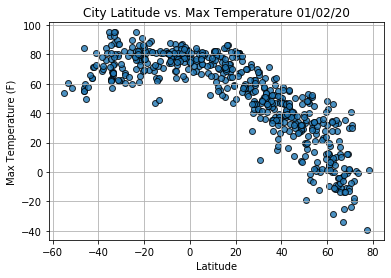

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

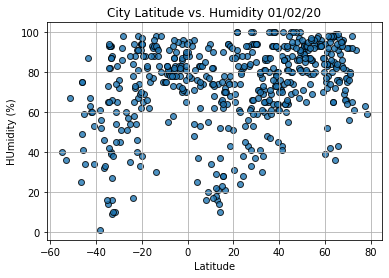

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("HUmidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

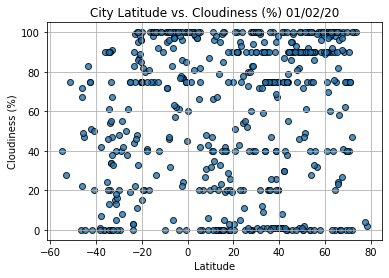

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

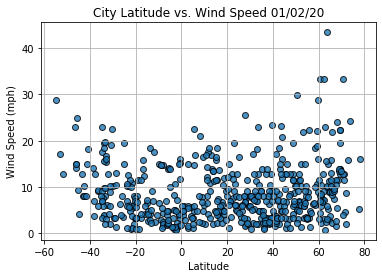

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()